In [1]:
import pandas as pd
dataset=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')

In [2]:
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Define start and end dates, and generate a list of all dates from 2013-01-01 to 2019-02-03
from datetime import date, timedelta
import pandas as pd

start_date = pd.to_datetime("2013-01-01")  # Start date
end_date = pd.to_datetime("2019-02-04") - timedelta(days=1)  # End date (excluding last day)

all_date = pd.date_range(start_date, end_date, freq='d')  # Generate all dates


In [5]:
all_date

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2019-01-25', '2019-01-26', '2019-01-27', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03'],
              dtype='datetime64[ns]', length=2225, freq='D')

In [6]:
dummyDate=dataset

In [7]:
# Assign the generated date range to the DataFrame's index
dummyDate.index=all_date

In [8]:
dummyDate

,Open,High,Low,Close
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-05,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2019-01-30,202.90,207.80,201.35,205.00
2019-01-31,206.00,206.85,202.05,202.95
2019-02-01,203.90,203.90,199.35,201.00
2019-02-02,200.00,222.00,196.00,218.35


In [9]:
#DateIndex.index=pd.to_datetime(dataset["Date"],infer_datetime_format=True)

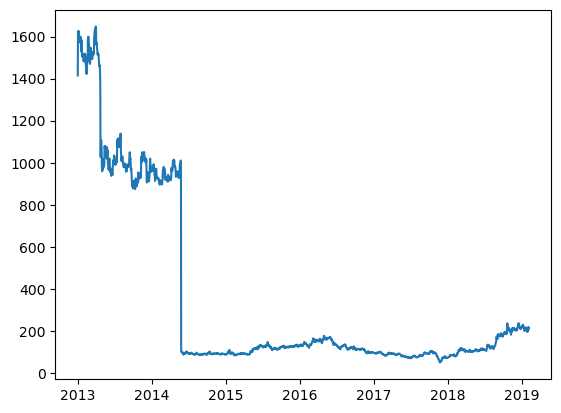

In [10]:
import matplotlib.pyplot as plt
plt.plot(dataset["Close"])

In [11]:
!pip install statsmodels

<Figure size 1600x500 with 0 Axes>

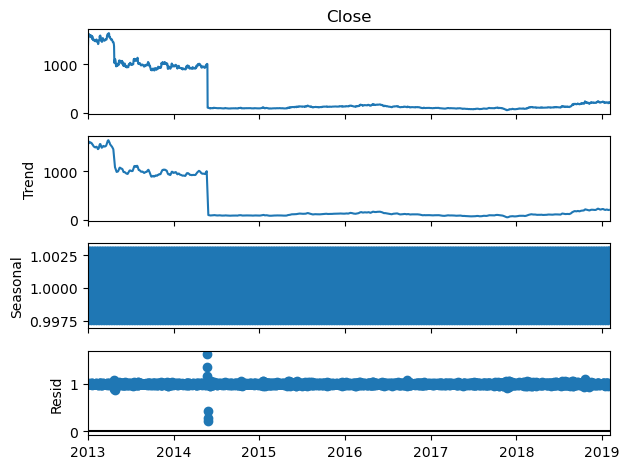

In [12]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='multiplicative')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

<Figure size 1600x500 with 0 Axes>

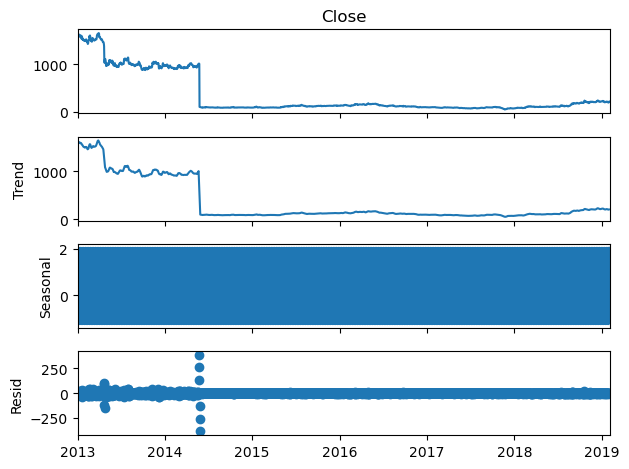

In [13]:
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dummyDate["Close"], model='additive')
plt.figure(figsize=(16,5))
result.plot()
plt.show()

In [14]:
# ADF Test for stationarity with custom results and plot saving
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd

def adf_test(timeseries, df, pollutant):
    plt.figure(figsize=(16,5))  # Create plot
    dftest = adfuller(timeseries, autolag='AIC')  # ADF Test
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value  # Add critical values
    print(dfoutput)
    
    # Hypothesis testing
    if dftest[0] < min(dftest[4].values()) and dftest[1] < 0.05:
        message = "Stationarity based on ADH"
    else:
        message = "Non-stationarity based on ADH"
    
    # Plot and save
    plt.plot(df.index, df[pollutant], label=pollutant)
    plt.legend(loc='best')
    plt.title(f"{message}_{pollutant}")
    plt.show()
    
    return message


Test Statistic                   -3.007236
p-value                           0.034224
#Lags Used                        1.000000
Number of Observations Used    2223.000000
Critical Value (1%)              -3.433295
Critical Value (5%)              -2.862841
Critical Value (10%)             -2.567463
dtype: float64


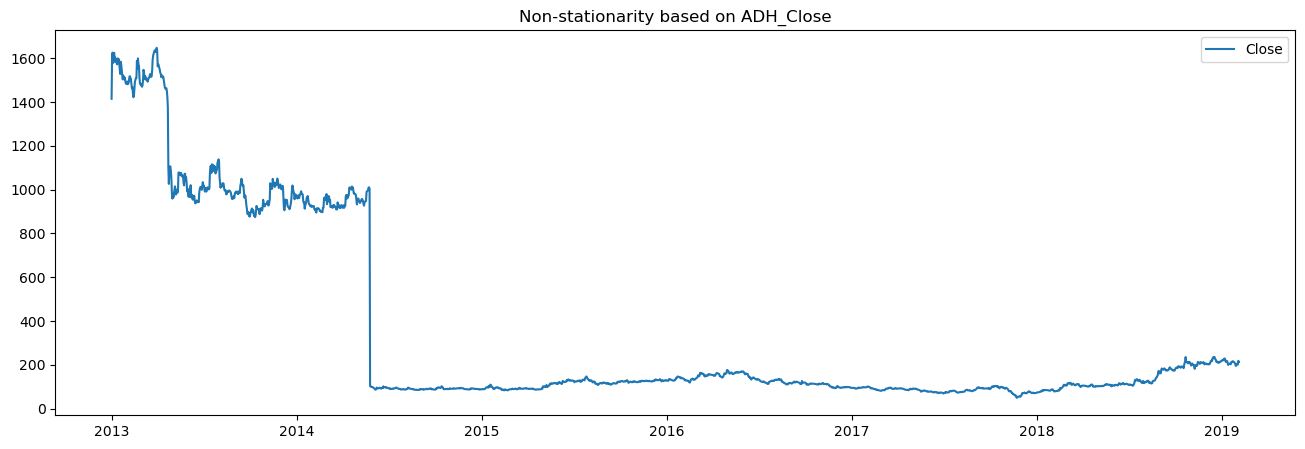

'Non-stationarity based on ADH'

In [15]:
adf_test(dataset["Close"],dataset,"Close")

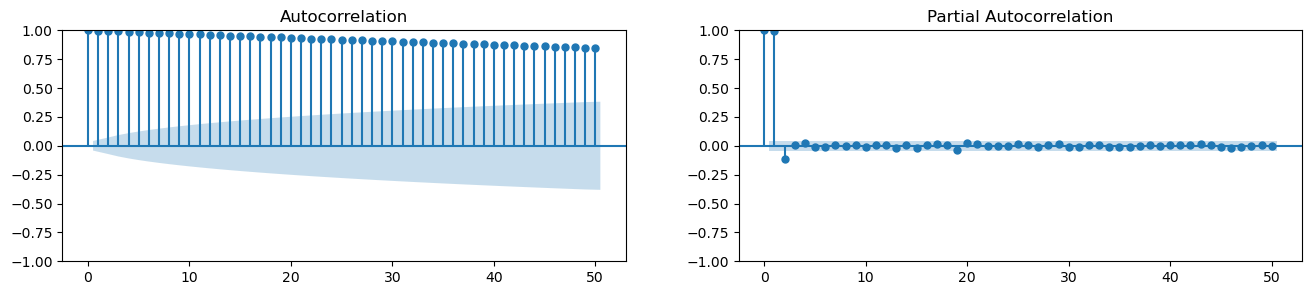

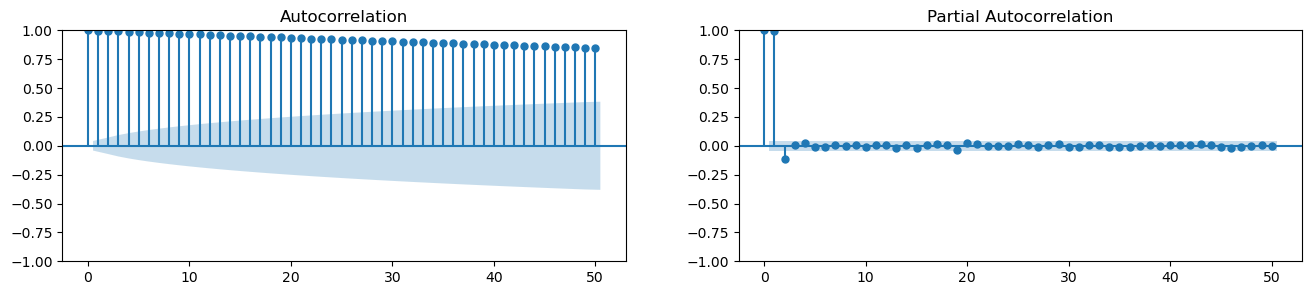

In [16]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(dataset.Close.tolist(), lags=50, ax=axes[0])
plot_pacf(dataset.Close.tolist(), lags=50, ax=axes[1])

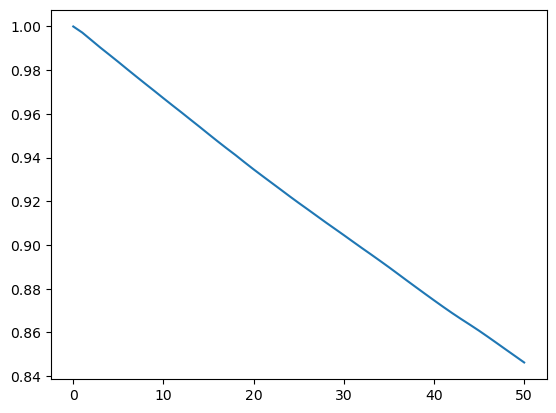

In [17]:
plt.plot(acf(dataset["Close"],nlags=50))

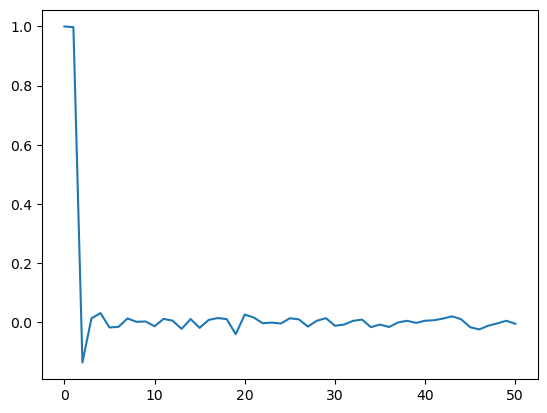

In [18]:
plt.plot(pacf(dataset["Close"],nlags=50))

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

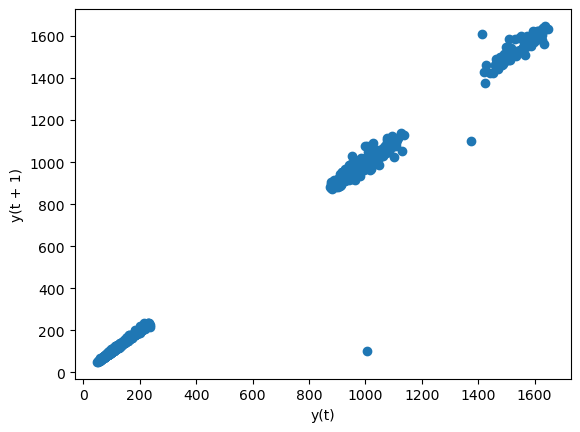

In [19]:
from pandas.plotting import lag_plot
lag_plot(dataset["Close"],lag=1)

## Forecastability

### Apen small- Forecastability is possible
### Spen Small-Forecastability is possible

In [20]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

In [21]:
import numpy as np
print(ApEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))  

0.027409184525792107


In [22]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

In [23]:
print(SampEn(dataset["Close"], m=2, r=0.2*np.std(dataset["Close"])))

0.007918086989927514
